In [1]:
import numpy as np
import pandas as pd
import yfinance as yf 
import matplotlib.pyplot as plt

In [58]:
RISK_FREE_RATE = 0.05 #market return
MONTHS = 12  

In [19]:
Data = None
stocks = ['IBM','^GSPC']#rm used is S&P 500(^GSPC)

start_date = '2010-01-01'
end_date = '2020-01-01'
def download_data(): 
    data = {}
    for stock in stocks:
        ticker = yf.download(stock,start_date,end_date)
        data[stock] = ticker['Adj Close']

    return pd.DataFrame(data) 

In [46]:
def initialize():
    stock_data = download_data()
    #using resample we use monthly returns instead of daily returns 
    stock_data = stock_data.resample('M').last()
    #seprating stock and S&P 500 closing price
    
    Data = pd.DataFrame({'s_adjclose' : stock_data[stocks[0]],
                        'm_adjclose' : stock_data[stocks[1]]})
    
    #calculate logarithmic monthly returns
    
    Data[['s_return','m_return']] = np.log(Data[['s_adjclose','m_adjclose']]/
                                               Data[['s_adjclose','m_adjclose']].shift(1))
  
    print(Data)
    Data = Data[1:] # remove NaN
    print(Data)
    
    return Data
     
       
    
Data = initialize()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
            s_adjclose   m_adjclose  s_return  m_return
Date                                                   
2010-01-31   72.395264  1073.869995       NaN       NaN
2010-02-28   75.553200  1104.489990  0.042696  0.028115
2010-03-31   76.200806  1169.430054  0.008535  0.057133
2010-04-30   76.646431  1186.689941  0.005831  0.014651
2010-05-31   74.805779  1089.410034 -0.024308 -0.085532
...                ...          ...       ...       ...
2019-08-31  106.343719  2926.459961 -0.077926 -0.018257
2019-09-30  114.103889  2976.739990  0.070433  0.017035
2019-10-31  104.931335  3037.560059 -0.083803  0.020226
2019-11-30  106.742317  3140.979980  0.017111  0.033480
2019-12-31  106.416794  3230.780029 -0.003054  0.028189

[120 rows x 4 columns]
            s_adjclose   m_adjclose  s_return  m_return
Date                                                  

In [52]:
def calculate_beta():
    #covariance matrix: diagonal elements are variances
    #covariance[0,1]= cov btw IBM & S&P500(sym matrix)(diagonal elements)
    #covariance[1,1]= cov of itself / variance of S&P500(rm)
    #covariance[0,0]= cov of itself / variance of IBM(ra)
    
    covariance_matrix = np.cov(Data['s_return'],Data['m_return'])
    print(covariance_matrix)
    beta = covariance_matrix[0,1]/covariance_matrix[1,1]
    print(f"beta from formula = {beta}")
    
calculate_beta()
    

[[0.00322081 0.00121742]
 [0.00121742 0.00128235]]
beta from formula = 0.9493625757724496


beta using regression = 0.9493625757724492
Expected annual return = 0.10797857724727611


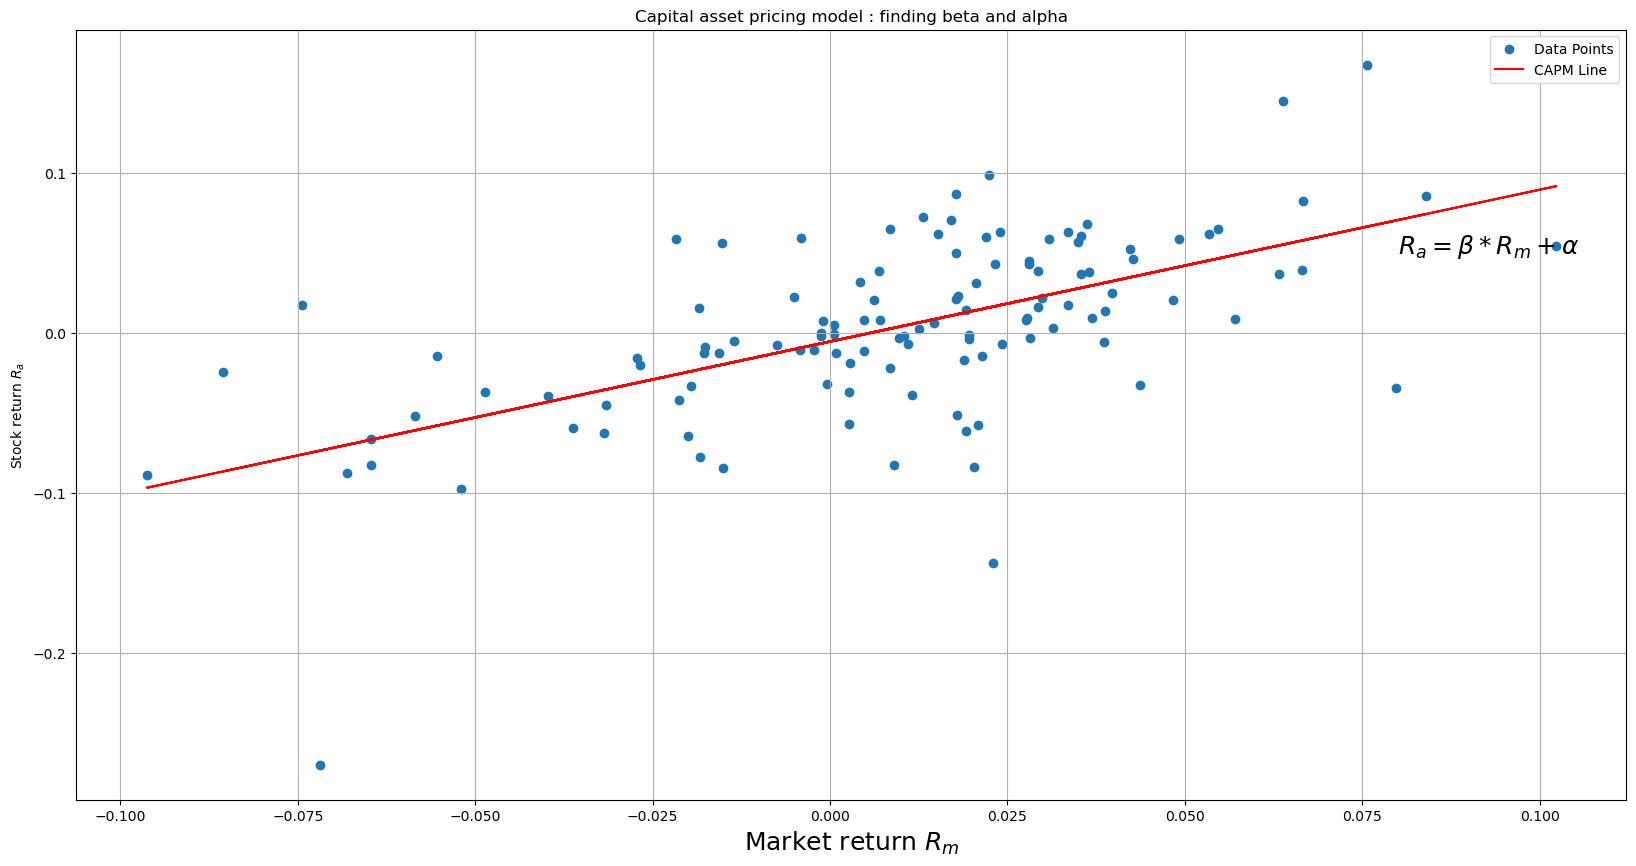

In [77]:
def regression():
    #use linear regression to fit a line
    #beta is slope
    
    beta, alpha = np.polyfit(Data['m_return'],Data['s_return'], deg=1)#deg type of equation eg 2-quadratic,3-cubic
    print(f'beta using regression = {beta}')
    
    #calculate expected return using CAP
    #multiple by 12 for expected annual return
    #use .mean() for 'expected' return
    
    
    Expected_return = RISK_FREE_RATE + beta * (Data['m_return'].mean()*MONTHS - RISK_FREE_RATE)
    
    print(f'Expected annual return = {Expected_return}')
    
    plot_regression(beta,alpha)
    
    
    
    
regression()

In [75]:
def plot_regression(beta,alpha):
    fig, axis = plt.subplots(1,figsize=(20,10))
    axis.scatter(Data['m_return'],Data['s_return'],label="Data Points")#scatter plot
    axis.plot(Data['m_return'], beta*Data['m_return']+alpha,color = 'red',label = 'CAPM Line')#linear line through the plot
    plt.title('Capital asset pricing model : finding beta and alpha')
    plt.xlabel('Market return $R_m$',fontsize = 18)#  $R_m$ shows subscript
    plt.ylabel('Stock return $R_a$')
    plt.text(0.08,0.05,r'$R_a = \beta* R_m + \alpha$',fontsize = 18)#\beta shows greek
    plt.legend()
    plt.grid(True)
    plt.show
    
    
    
     